In [1]:
# !pip install langdetect
# !pip install googletrans
# !pip install collections
# !pip install googletrans==3.1.0a0
# !pip install contractions
# !pip install autocorrect

In [2]:
# !pip install unidecode
# !pip install emoji
# !pip install wordcloud

In [3]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('stem')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [4]:
import pandas as pd
from langdetect import detect
from googletrans import Translator
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import contractions
import re
from unidecode import unidecode
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("recession_tweets_oct_dec_22.csv")
data

,Unnamed: 0,Date,User,Tweet,likeCount,replyCount,retweetCount,location
0,0,2022-12-13 23:47:18+00:00,NickMorenoLive,They are barking loud now that they can't pay ...,0,0,0,United States
1,1,2022-12-13 23:46:49+00:00,InvariantPersp1,#recession ... #GFC2 US #CPI #Consumer #Inflat...,2,0,0,NaN
2,2,2022-12-13 23:46:02+00:00,FXStreetNews,GBP/JPY eyes downside to near 167.00 as furthe...,2,0,0,Barcelona
3,3,2022-12-13 23:37:23+00:00,Frugalology,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
4,4,2022-12-13 23:36:55+00:00,FrugalMag,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
...,...,...,...,...,...,...,...,...
34845,34845,2022-10-01 00:29:26+00:00,Nippi25James,"I’m so poor, I can’t even pay attention! #Mini...",0,0,0,UK
34846,34846,2022-10-01 00:25:54+00:00,Wealth_Nodes,Stanley Black and Decker cut about 1000 financ...,0,0,0,NaN
34847,34847,2022-10-01 00:16:46+00:00,MortgageMark,Prepare yourself accordingly #recession #canad...,1,0,0,"Burnaby, BC, CA, V5E 4G2"
34848,34848,2022-10-01 00:07:54+00:00,haqsmusings,#India central bank chief Das raises interest ...,1,0,0,"Silicon Valley, CA"


In [6]:
df = data[["User","Tweet","likeCount","replyCount","retweetCount","location"]]
df

,User,Tweet,likeCount,replyCount,retweetCount,location
0,NickMorenoLive,They are barking loud now that they can't pay ...,0,0,0,United States
1,InvariantPersp1,#recession ... #GFC2 US #CPI #Consumer #Inflat...,2,0,0,NaN
2,FXStreetNews,GBP/JPY eyes downside to near 167.00 as furthe...,2,0,0,Barcelona
3,Frugalology,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
4,FrugalMag,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
...,...,...,...,...,...,...
34845,Nippi25James,"I’m so poor, I can’t even pay attention! #Mini...",0,0,0,UK
34846,Wealth_Nodes,Stanley Black and Decker cut about 1000 financ...,0,0,0,NaN
34847,MortgageMark,Prepare yourself accordingly #recession #canad...,1,0,0,"Burnaby, BC, CA, V5E 4G2"
34848,haqsmusings,#India central bank chief Das raises interest ...,1,0,0,"Silicon Valley, CA"


In [7]:
df['Tweet'][214]

'#BBAS3: dark cloud \n#bancodobrasil #Finances #CPI #ibovespa #patterns #Fibonacci #analisegrafica #tradingsignal #ForaLulaLadrão #inflation #recession #DXY #SP500 https://t.co/pgD0nTLPsA'

In [8]:
def det_lang(data):
    lang = detect(data)
    return lang

In [9]:
def lang_trans(data):
    trans = Translator()
    translated_text = trans.translate(data)
    return translated_text.text

In [10]:
from string import punctuation
#preprocessing
#remove_spaces
def remove_words(data):
    words = data.split()
    new = [word.strip("'\n','#','@'") for word in words]
    new_text = " ".join(new)
    pattern = r'http\S+'
    clean_text = re.sub(pattern,'',new_text)
    return clean_text

def remove_emoji(data):
    clean_text = emoji.demojize(data)
    return clean_text


# contranction_mapping
def expand_text(data):
    clean_text = contractions.fix(data)
    return clean_text

#handling accented character
def acc_char(data):
    clean_text = unidecode(data)
    return clean_text

#removing remove stopwords
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

#lower the data
def lower_word(data):
    tokens = word_tokenize(data)
    new_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and
                (len(word)>2) and (word.isalpha())]
    clean_text = " ".join(new_text)
    return clean_text

# autocorrect
def autocorrect(data):
    spell = Speller(lang='en')
    cor_word = spell(data)
    return cor_word

#lemetization
def lemmatizer(data):
    lemmatizer = WordNetLemmatizer()
    final_words = []
    for word in data:
        lem_word =  lemmatizer.lemmatize(word)
        final_words.append(lem_word)
    return "".join(final_words)

In [11]:
%%time
clean_text_train = df.Tweet.apply(remove_words)
clean_text_train = clean_text_train.apply(remove_emoji)
clean_text_train = clean_text_train.apply(lower_word)
df['Tweet'] = clean_text_train
df['language'] = clean_text_train.apply(det_lang)
foreign_lang_index = list(df[df['language']!= 'en'].index)
for i in foreign_lang_index:
    df['Tweet'].iloc[i] = lang_trans(df['Tweet'][i])
clean_text_train = df.Tweet.apply(expand_text)
clean_text_train = clean_text_train.apply(acc_char)
# clean_text_train = clean_text_train.apply(autocorrect)
clean_text_train = clean_text_train.apply(lemmatizer)

Wall time: 14min 9s


In [12]:
clean_text_train

0        barking loud pay even interest debt interestin...
1        recession cpi consumer inflation edition defla...
2        eyes downside near boe rate hike bolster reces...
3        frugal tips save money groceries inflation fru...
4        frugal tips save money groceries inflation fru...
                               ...                        
34845    poor even pay attention minibudget poverty ban...
34846    stanley black decker cut finance jobs part mil...
34847                 prepare accordingly recession canada
34848    india central bank chief das raises interest r...
34849    recession amp inflation centered tweets past r...
Name: Tweet, Length: 34850, dtype: object

## EDA

In [13]:
def ngrams_extrct(data,ngram_range):
    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)
    ngram_list = []
    for i in ngram:
        ngram_list.append(' '.join(i))
    return ngram_list

In [14]:
list_unigram = clean_text_train.apply(lambda x : ngrams_extrct(x,1))
final_unigram = []
for i in list_unigram:
    final_unigram.extend(i)

count = Counter(final_unigram).most_common(25)
print(count,end=" ")

[('recession', 41111), ('inflation', 9971), ('economy', 6241), ('layoffs', 4879), ('jobs', 3600), ('layoff', 3489), ('amp', 3277), ('robot', 3053), ('thelayoff', 2854), ('fed', 2692), ('not', 2635), ('market', 2395), ('business', 2161), ('economic', 2102), ('edition', 2085), ('global', 1944), ('whitecollarjobs', 1916), ('stocks', 1905), ('stockmarket', 1834), ('intel', 1830), ('intc', 1590), ('qcom', 1571), ('news', 1567), ('markets', 1442), ('year', 1408)] 

In [15]:
list_bigram = clean_text_train.apply(lambda x : ngrams_extrct(x,2))
final_bigram = []
for i in list_bigram:
    final_bigram.extend(i)

count = Counter(final_bigram).most_common(25)
print(count,end=" ")

[('inflation recession', 3254), ('layoff layoffs', 3153), ('jobs recession', 2796), ('layoffs thelayoff', 2789), ('recession whitecollarjobs', 1916), ('whitecollarjobs layoff', 1913), ('recession inflation', 1898), ('thelayoff robot', 1770), ('economy recession', 1362), ('recession layoff', 899), ('bubble edition', 867), ('recession economy', 811), ('intel intc', 789), ('intc intc', 788), ('chips semiconductors', 786), ('thelayoff ibm', 786), ('semiconductors californiajobs', 785), ('californiajobs oregonjobs', 785), ('ibm qcom', 785), ('qcom qcom', 785), ('intc hightech', 783), ('oregonjobs jobs', 783), ('hightech chips', 782), ('qcom qualcomm', 779), ('qualcomm robot', 768)] 

In [16]:
list_trigram = clean_text_train.apply(lambda x : ngrams_extrct(x,3))
final_trigram = []
for i in list_trigram:
    final_trigram.extend(i)

count = Counter(final_trigram).most_common(25)
print(count,end=" ")

[('layoff layoffs thelayoff', 2784), ('recession whitecollarjobs layoff', 1913), ('whitecollarjobs layoff layoffs', 1910), ('jobs recession whitecollarjobs', 1905), ('layoffs thelayoff robot', 1722), ('recession layoff layoffs', 883), ('jobs recession layoff', 815), ('intel intc intc', 788), ('layoffs thelayoff ibm', 786), ('chips semiconductors californiajobs', 785), ('semiconductors californiajobs oregonjobs', 785), ('thelayoff ibm qcom', 785), ('ibm qcom qcom', 785), ('intc intc hightech', 783), ('californiajobs oregonjobs jobs', 783), ('oregonjobs jobs recession', 783), ('hightech chips semiconductors', 782), ('intc hightech chips', 781), ('qcom qcom qualcomm', 779), ('qcom qualcomm robot', 768), ('telco telcolayoffs telecom', 541), ('telcolayoffs telecom jobs', 539), ('telecom jobs recession', 539), ('att attandt telco', 513), ('attandt telco telcolayoffs', 513)] 

In [17]:
def wordcloud(data,column):
    df_ = data[column].str.cat(sep=' ')
    text = ' '.join([word for word in df_.split()])
    wordcloud = WordCloud(width = 700,height = 500,background_color='white').generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

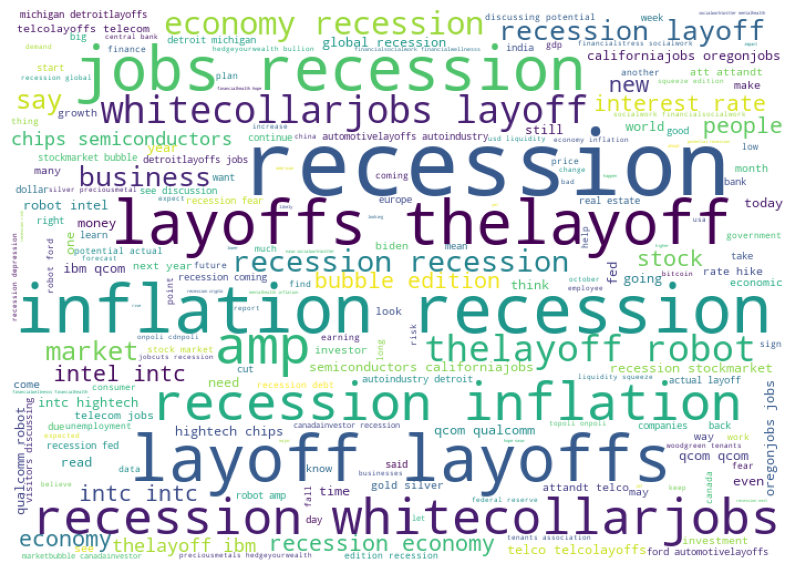

In [19]:
wordcloud(df,'Tweet')